In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
legend_properties = {'weight':'bold'}

In [2]:
data_folder = r"E:\data\dao-0310-23\V4_4\Supervision_p1"
hierarchy_performance_file = data_folder + r"\hierarchy_performance_across_p1"
superior_performance_file = data_folder + r"\superior_performance_across_p1"
hierarchy_diversity_file = data_folder + r"\hierarchy_diversity_across_p1"
hierarchy_variance_file = data_folder + r"\hierarchy_variance_across_p1"

# add some reference line
dao_performance_file = "E:\data\dao-0310-23\V4_3\Threshold\dao_performance_across_threshold"

with open(hierarchy_performance_file, 'rb') as infile:
    hierarchy_performance = pickle.load(infile)
with open(hierarchy_diversity_file, 'rb') as infile:
    hierarchy_diversity = pickle.load(infile)
with open(superior_performance_file, 'rb') as infile:
    superior_performance = pickle.load(infile)
with open(hierarchy_variance_file, 'rb') as infile:
    hierarchy_variance = pickle.load(infile)
with open(dao_performance_file, 'rb') as infile:
    dao_performance = pickle.load(infile)
print(max(dao_performance), min(dao_performance))

0.7910285714285717 0.5690901587301586


In [3]:
# Define more colors
# NUS two colors
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"

In [4]:
# # Performance
# x =  np.arange(0.1, 1.0, 0.1)
# # print(hierarchy_performance)
# # plt.plot(x, hierarchy_percentile_10, "k--", label="10th Percentile")
# plt.plot(x, hierarchy_performance, "k-", label="Hierarchy")
# # plt.plot(x, hierarchy_percentile_90, "k-.", label="90th Percentile")
# plt.xlabel('$p_1$', fontweight='bold', fontsize=10)
# plt.ylabel('Diversity', fontweight='bold', fontsize=10)
# # plt.xticks(x)
# plt.legend(frameon=False, ncol=1, fontsize=10)
# plt.savefig(data_folder + r"\Supervision_performance.png", transparent=False, dpi=300)
# plt.show()
# plt.clf()

In [5]:
# # Diversity
# x =  np.arange(0.1, 1.0, 0.1)
# legend_properties = {'weight':'bold'}
# plt.plot(x, hierarchy_diversity, "k-", label="Hierarchy")
# plt.xlabel('Time', fontweight='bold', fontsize=12)
# plt.ylabel('Diversity', fontweight='bold', fontsize=12)
# # plt.xticks(x)
# plt.legend(frameon=False, ncol=1, fontsize=12, prop=legend_properties)
# plt.savefig(data_folder + r"\Supervision_diversity.png", transparent=False, dpi=300)
# plt.show()
# plt.clf()

DAO range:  0.7910285714285717 0.6753898412698411
theta=0.5:  0.7156895238095237
0.258964913896307 0.7156895238095237


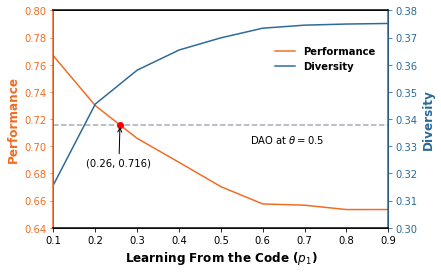

<Figure size 432x288 with 0 Axes>

In [11]:
# Twin  across p_1 (learning from code); p_2 = 
x =  np.arange(0.1, 1.0, 0.1)
nusblue = "#003D7C"
nusorange = "#EF7C00"
legend_properties = {'weight':'bold'}

fig,ax1 = plt.subplots()
ax1.set_xlabel("Learning From the Code ($p_1$)", fontweight='bold', fontsize = 12)
ax1.set_ylabel("Performance", fontweight='bold', color="black", fontsize=12)

ax2=ax1.twinx()
ax2.set_ylabel("Diversity", fontweight='bold', color="black", fontsize=12)

ax2.spines['left'].set_color(nature_orange) # left y-axis
ax1.yaxis.label.set_color(nature_orange) # left y-axis labels
ax1.tick_params(axis='y', colors=nature_orange) # left y-axis params
ax2.spines['right'].set_color(nature_blue) # right y-axis
ax2.yaxis.label.set_color(nature_blue)  # right y-axis labels
ax2.tick_params(axis='y', colors=nature_blue) # right y-axis params

ax2.spines["left"].set_linewidth(1.5)
ax2.spines["right"].set_linewidth(1.5)
ax2.spines["top"].set_linewidth(1.5)
ax2.spines["bottom"].set_linewidth(1.5)

ax2.set_xlim([0.1, 0.9])
ax1.set_ylim([0.64, 0.80])
ax2.set_ylim([0.30, 0.38])
max_dao = max(dao_performance[:21])
min_dao = min(dao_performance[:21])
print("DAO range: ", max_dao, min_dao)
# rect = patches.Rectangle((-0.1, 0.5*(max_dao + min_dao)), 1, max_dao-0.5*(max_dao + min_dao), linewidth=1, edgecolor=shallow_grey, facecolor=shallow_grey)
# ax1.add_patch(rect)
# ax1.text(x=0.5, y=0.72, s=r"DAO performance with $\theta$ in [0.4, 0.6]", horizontalalignment='center', fontsize=12, fontweight='bold')

line_1 = ax1.plot(x, hierarchy_performance, "-", color=nature_orange, label="Performance")
line_2 = ax2.plot(x, hierarchy_diversity, "-", color= nature_blue, label="Diversity")

lines_1 = line_1 + line_2
labs_1 = [l.get_label() for l in lines_1]
ax1.legend(lines_1, labs_1, frameon=False, loc=(0.65, 0.70), fontsize=12,  ncol=1, prop=legend_properties)

# lines_2 = line_2
# labs_2 = [l.get_label() for l in lines_2]
# ax2.legend(lines_2, labs_2, frameon=False, fontsize=12, loc=(0, 1.05),  ncol=3, prop=legend_properties)

# add the reference line of naive DAO
reference_value = dao_performance[10]
print("theta=0.5: ", reference_value)
line_3 = ax1.axhline(y=reference_value, color=deep_grey, linestyle='--')  # theta=0.5
ax1.annotate('DAO at $\\theta=0.5$', xy=(250, 130), xycoords='figure points')

# Find the point on the line where y equals a certain value (i.e., DAO performance)
x_vals = x
y_vals = hierarchy_performance
y_value = reference_value
x_intersect = None
for i in range(len(x_vals)-1):
    if min(y_vals[i], y_vals[i+1]) <= y_value <= max(y_vals[i], y_vals[i+1]):
        x_intersect = x_vals[i] + (y_value - y_vals[i]) * (x_vals[i+1] - x_vals[i]) / (y_vals[i+1] - y_vals[i])
        break
print(x_intersect, y_value)
# Plot the intersection point
if x_intersect is not None:
    ax1.plot(x_intersect, y_value, "ro")
    arrow = ax1.annotate('({0}, {1})'.format('%.2f'%x_intersect, '%.3f'%y_value), xy=(x_intersect, y_value), xytext=(x_intersect-0.08, y_value-0.03),  textcoords='data', arrowprops=dict(arrowstyle="->", facecolor='black'))
plt.savefig(data_folder + r"\p1_performance_diversity.png", transparent=True, dpi=300, bbox_inches='tight')
plt.show()
plt.clf()